Exploratory Data Analysis on Haberman Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
dataset = pd.read_csv("haberman.csv",header=None)


In [3]:
dataset.columns = ['age','year','axil_nodes','survived']


In [19]:
dataset.head()

,age,year,axil_nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [21]:
print (dataset.shape)

(306, 4)


In [25]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age           306 non-null int64
year          306 non-null int64
axil_nodes    306 non-null int64
survived      306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


,age,year,axil_nodes,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [29]:
dataset['survived'].value_counts()

1    225
2     81
Name: survived, dtype: int64

##Observations:
1.Dataset has 306 data points and 4 features(including Target variable).
2.Target Variable(survived) has 2 classes = 1--> survived for 5 years or longer 2--> not survived for 5 years or longer
  and its imbalanced( 225 : 81)
3.Patient's age is between 30 and 83 and mean is 52.
4.75% patients has age less than 60(approx).
5.75% patients has less than than 4 axilary nodes although max number is 52.
6.Operations begin in the year 1958 and last operation happened in 1969.

OBJECTIVE : To predict if patient will survive or not given his age, year of operation ,number of axilary nodes information.

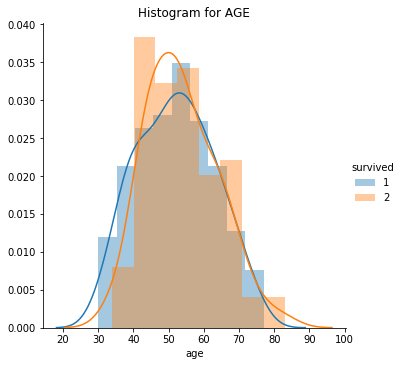

In [8]:
#UNIVARIATE ANALYSIS
#Histogram

sns.FacetGrid(dataset, hue="survived", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram for AGE")
plt.show();


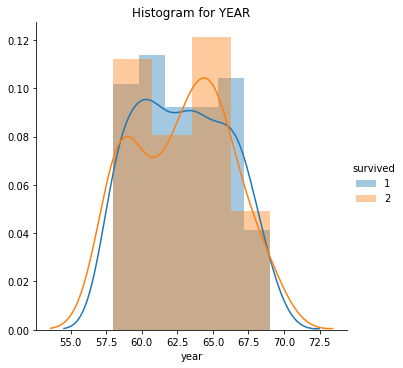

In [9]:
sns.FacetGrid(dataset, hue="survived", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram for YEAR")
plt.show();

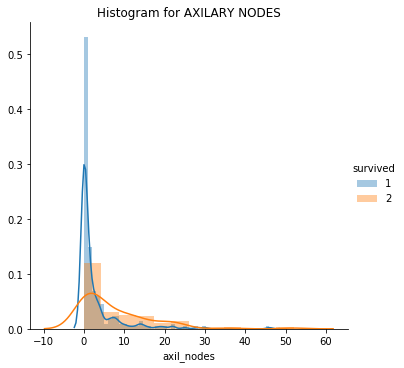

In [10]:
sns.FacetGrid(dataset, hue="survived", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title("Histogram for AXILARY NODES")
plt.show();

Observations:
1.All the plots are ovelapping so it is difficult to conclude.
2.Although, we can say that patients with less no of axil_nodes(0-5) have  more chances of survivng.
3.Operation year having range (60-67) had highest successfull survival rate.

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* axil_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


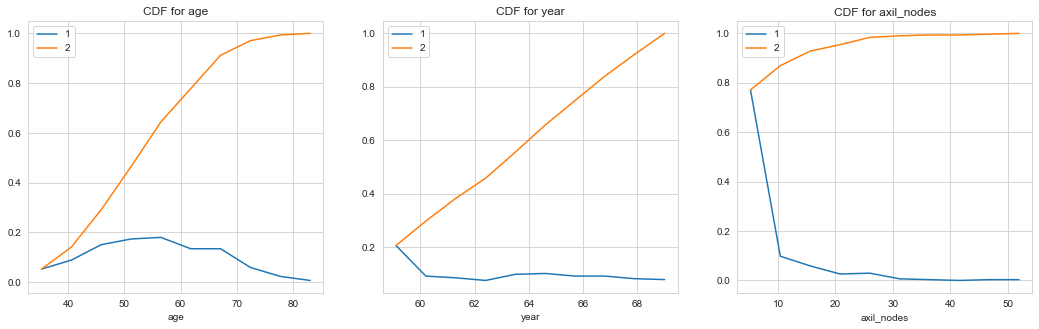

In [63]:
#CDF :(CODE REFERENCE : WITH THE HELP of KAGGLE KERNELS)

plt.figure(figsize=(18,5))
for idx, feature in enumerate(list(dataset.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(dataset[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)
    plt.legend(dataset['survived'].unique())
    plt.title("CDF for {}".format(feature))

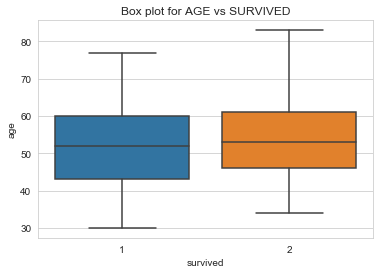

In [65]:
# Box plots:
plt.title("Box plot for AGE vs SURVIVED")  
sns.boxplot( x='survived', y='age', data=dataset) 
plt.show()     

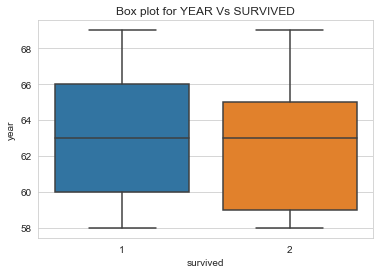

In [51]:
plt.title("Box plot for YEAR Vs SURVIVED")  
sns.boxplot( x='survived', y='year', data=dataset)         
plt.show() 

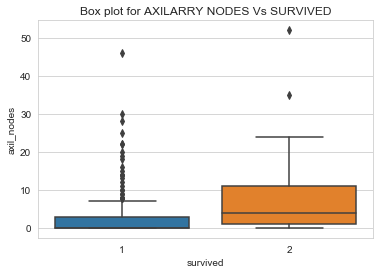

In [52]:
plt.title("Box plot for AXILARRY NODES Vs SURVIVED")  
sns.boxplot( x='survived', y='axil_nodes', data=dataset)         
plt.show() 

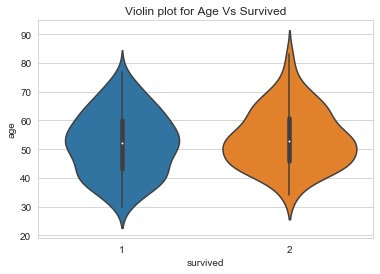

In [39]:
# Violin plots:

plt.title("Violin plot for Age Vs Survived")  
sns.violinplot( x='survived', y='age', data=dataset)         
plt.show() 


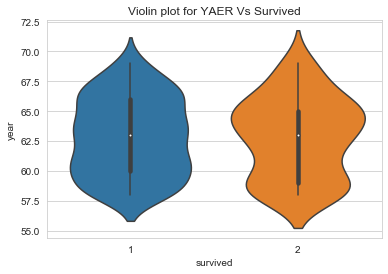

In [40]:
plt.title("Violin plot for YAER Vs Survived")  
sns.violinplot( x='survived', y='year', data=dataset)         
plt.show() 


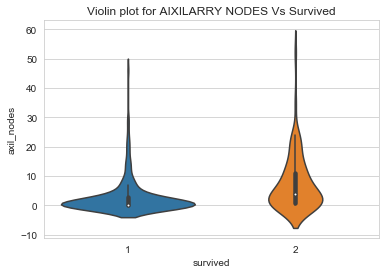

In [41]:
plt.title("Violin plot for AIXILARRY NODES Vs Survived")  
sns.violinplot( x='survived', y='axil_nodes', data=dataset)         
plt.show() 


In [ ]:
#Observations:
1.From observations on AXIL_NODE and SURVIVED, we can conclude that higher the axil_nodes, higher the chances of their death.

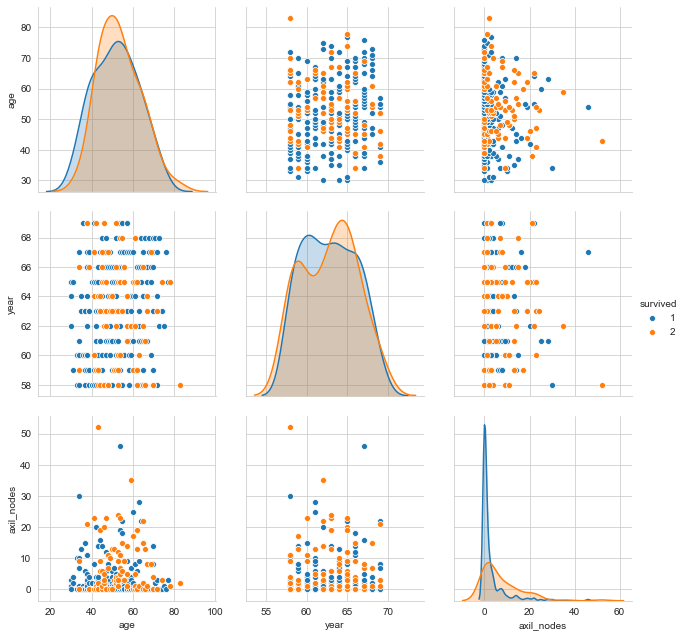

In [19]:
#Pair plot:

plt.close()
sns.set_style("whitegrid")
sns.pairplot(dataset,vars=["age", "year","axil_nodes"],hue ='survived',size=3)
plt.show()

Observation:

1.We are unable to classify which is the most useful feature because of too much overlapping. 
2.And hence, this plot is not much informative in this case

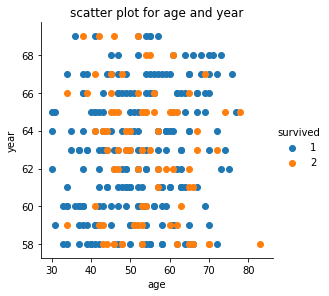

In [6]:
sns.FacetGrid(dataset, hue = "survived", size = 4).map(plt.scatter, "age", "year").add_legend()
plt.title("scatter plot for age and year")
plt.show()

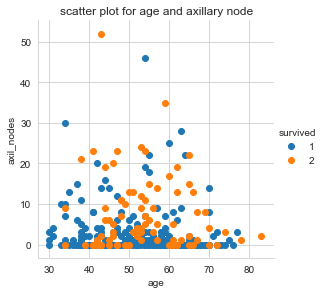

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset, hue = "survived", size = 4).map(plt.scatter, "age", "axil_nodes").add_legend()
plt.title("scatter plot for age and axillary node")
plt.show()

Conclusion:

1.The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
2.Datapoints are not linearly seprable. There are too much overlapping in the data-points and hence it is very diffucult to classify.
3.Based on our observations,we can say that axillary node is giving more information than others.

In [1]:
!jupyter nbconvert final.ipynb

[NbConvertApp] Converting notebook final.ipynb to html
[NbConvertApp] Writing 688599 bytes to final.html
